# Does Freedom Equal Happiness? - A Look at Factors Contributing to Happiness on a Global Scale

Many people often say that a major goal in their in life is to simply "be happy" and many important life descisions are made based almost solely on what will make someone happier.  However, despite this central role that happiness plays in all of our lives, currently we are unable to directly measure "happiness" in humans or what contributes to an individuals happiness since what we define as "happiness" can vary based on endless factors that vary from individual to individual and in different circumstances.  One attempt at looking at happiness on a global scale is the World Happiness report, which was an attempt at estimating global happiness using data from the Gallup World Poll[1].  The happiness scores presented in this dataset are based on answers to the main life evaluation question that was asked in the poll which asked respondents to "think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale" (also known as the Cantril ladder).
    Since these happiness scores are globally representative, they can be used to delve further into what factors most often contribute to peoples overall feeling of happiness worldwide.  That is why this research is proposing to determine if there is a correlation between happiness scores obtained from the World Happiness report and global freedom scores obtained from the Cato Institutes Human Freedom Index (HFI), which is one of the most comprehensive indexes of freedoms on a global scale [2].  The HFI, released by the Cato instutute in 2017 is a broad measure of human freedom, which they define simply as the "lack of coercive constraint".  To estimate human freedom, this study broke human freedom down into two subcategories; personal freedom and economic freedom, the values for which were determined from the subcategories below.
    - Rule of Law 
    - Security and Safety
    - Movement 
    - Religion
    - Association, Assembly, and Civil Society
    - Expression and Information
    - Identity and Relationships
    - Size of Government
    - Legal System and Property Rights
    - Access to Sound Money
    - Fredom to Trade Internationally
    - Regulation of Credit, Labor, and Business
The values for these subcategories were also determined by weighting a varying number of even more subcategories within the subcategories mentioned above (For a table showing all metrics used see this [link](https://www.doyouevendata.com/wp-content/uploads/2018/03/cato.gif)).  Essentailly, what was done by this study was ranking each country on a scale of 1-10 in over 100 different categories and combining and weighting these categories to determine personal and economic freedom, which were then used to calculate human freedom.  The proposed research hopes to add value to each of these datasets by combining them in order to delve further into trends between the overall happiness score in a country and the relative amounts of freedom they experience there to determine which types of freedoms most strongly influence happiness.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
%matplotlib inline

In [29]:
# For the purposes of this research proposal, only the cato summary which includes only the final values for personal, economic, and human freedom will be displayed, although the full study hopes to include all factors
freedom = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\Capstone_2\cato_2017_summary.csv')
happy_15 = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\Capstone_2\Happy Data\happy_2015.csv')

# Subset freedom data into only entries for the year 2015
free_15 = freedom[ freedom['Year'] == 2015] 

In [55]:
free_15.describe()

,Year,PERSONAL FREEDOM (Score),ECONOMIC FREEDOM (Score),HUMAN FREEDOM (Score),HUMAN FREEDOM (Rank),HUMAN FREEDOM (Quartile)
count,159.0,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2015.0,7.067736,6.796855,6.932264,79.773585,2.503145
std,0.0,1.442425,0.914015,1.073753,46.060352,1.124380
min,2015.0,2.860000,2.920000,4.040000,1.000000,1.000000
25%,2015.0,6.025000,6.295000,6.335000,40.500000,1.500000
50%,2015.0,7.000000,6.890000,6.830000,78.000000,3.000000
75%,2015.0,8.245000,7.470000,7.850000,119.500000,3.500000
max,2015.0,9.470000,8.970000,8.890000,159.000000,4.000000


In [31]:
happy_15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [32]:
# Define function to count number of matching entries between dataset
def count_matches():
    count = 0
    for hap in happy_15['Country']:
        for free in free_15['Countries']:
            if hap == free:
                count = count + 1
    print("There are {} matching entries in the 2 datasets".format(count))
                
# Print length of each dataset and count matches
print("There are {} entries in the freedom dataset".format(len(free_15['Countries'])))
print("There are {} entries in the happiness dataset".format(len(happy_15['Country'])))
count_matches()

There are 159 entries in the freedom dataset
There are 158 entries in the happiness dataset
There are 140 matching entries in the 2 datasets


In [33]:
# Use loop to get list of matching entries from each list
matched = list()
for hap in happy_15['Country']:
    for free in free_15['Countries']:
        if hap == free:
                matched.append(hap)
                
# Determine ids for unmatched entries in each dataset
unmatched_happy = list()
for hap in happy_15['Country']:
     if hap in matched:
        pass
     else:
        unmatched_happy.append(hap)

unmatched_free = list()
for free in free_15['Countries']:
     if free in matched:
        pass
     else:
        unmatched_free.append(free)
        
# Print values to compare
print(unmatched_happy)
print(unmatched_free)

['Uzbekistan', 'South Korea', 'Belarus', 'North Cyprus', 'Kosovo', 'Turkmenistan', 'Kyrgyzstan', 'Somaliland region', 'Palestinian Territories', 'Iraq', 'Sudan', 'Congo (Kinshasa)', 'Djibouti', 'Yemen', 'Congo (Brazzaville)', 'Comoros', 'Ivory Coast', 'Afghanistan']
['Bahamas', 'Barbados', 'Belize', 'Brunei Darussalam', 'Cape Verde', 'Congo, Democratic Republic of', 'Congo, Republic of', "Cote d'Ivoire", 'Fiji', 'Gambia, The', 'GuineaBissau', 'Guyana', 'Korea, Republic of', 'Kyrgyz Republic', 'Namibia', 'Papua New Guinea', 'Seychelles', 'TimorLeste', 'Yemen, Rep.']


In [34]:
# Fix countries that are entered with different names in each dataset

# Fix entries in freedom dataset
free_15.loc[:,'Countries'].replace('Kyrgyz Republic',value='Kyrgyzstan',inplace=True)
free_15.loc[:,'Countries'].replace('Korea, Republic of',value='South Korea',inplace=True)
free_15.loc[:,'Countries'].replace('Cote d\'Ivoire',value='Ivory Coast',inplace=True)
free_15.loc[:,'Countries'].replace('Yemen, Rep.',value='Yemen',inplace=True)

# Fix entries in happiness dataset
happy_15.loc[:,'Country'].replace('Congo (Kinshasa)',value='Congo, Democratic Republic of',inplace=True)
happy_15.loc[:,'Country'].replace('Congo (Brazzaville)',value='Congo, Republic of',inplace=True)

# Determine number of entries reconciled
count_matches()

There are 146 matching entries in the 2 datasets


In [35]:
# Rename countries column in freedom dataset to country
free_15 = free_15.rename(columns = {'Countries':'Country'})

# Join datasets based on country
df = happy_15.merge(free_15,how='inner',on='Country')

In [36]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year', 'ISO_Code',
       'PERSONAL FREEDOM (Score)', 'ECONOMIC FREEDOM (Score)',
       'HUMAN FREEDOM (Score)', 'HUMAN FREEDOM (Rank)',
       'HUMAN FREEDOM (Quartile)'],
      dtype='object')

In [37]:
df.head(n=5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,ISO_Code,PERSONAL FREEDOM (Score),ECONOMIC FREEDOM (Score),HUMAN FREEDOM (Score),HUMAN FREEDOM (Rank),HUMAN FREEDOM (Quartile)
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,CHE,9.33,8.44,8.89,1.0,1.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,ISL,9.01,7.23,8.12,31.0,1.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,DNK,9.36,7.77,8.56,8.0,1.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NOR,9.47,7.67,8.57,7.0,1.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,CAN,9.13,7.94,8.54,11.0,1.0


# Join Discussion
The output above shows that the join above was sucessful and that a total of 146 matching entries between the datasets that could potentially be used for the purposes of this study, meaning that there is a fairly representative sample size that could be used for the purposes of this study.  That is why this study has chosen to neglect the other 25 unmatched countries (displayed below).

# WRITE CODE TO DISPLAY UNMATCHED COUNTRIES HERE

In [57]:
# Use loop to get list of matching entries from each list
matched = list()
for hap in happy_15['Country']:
    for free in free_15['Country']:
        if hap == free:
                matched.append(hap)
                
# Determine ids for unmatched entries in each dataset
unmatched_happy = list()
for hap in happy_15['Country']:
     if hap in matched:
        pass
     else:
        unmatched_happy.append(hap)

unmatched_free = list()
for free in free_15['Country']:
     if free in matched:
        pass
     else:
        unmatched_free.append(free)
        
# Print values to compare
print(unmatched_happy)
print(unmatched_free)

['Uzbekistan', 'Belarus', 'North Cyprus', 'Kosovo', 'Turkmenistan', 'Somaliland region', 'Palestinian Territories', 'Iraq', 'Sudan', 'Djibouti', 'Comoros', 'Afghanistan']
['Bahamas', 'Barbados', 'Belize', 'Brunei Darussalam', 'Cape Verde', 'Fiji', 'Gambia, The', 'GuineaBissau', 'Guyana', 'Namibia', 'Papua New Guinea', 'Seychelles', 'TimorLeste']


Now that the data has been joined, I use the code in the cells below to look at the distributions of the happiness scores obtained, and compare them to the distributions of each of the final 3 freedom scores obtained.

# ADD PP and QQ PLOTS FOR ALL VARIABLES BELOW AND CLEAN UP CHARTS

Text(0.5, 1.0, 'Happiness Score PP Plot')

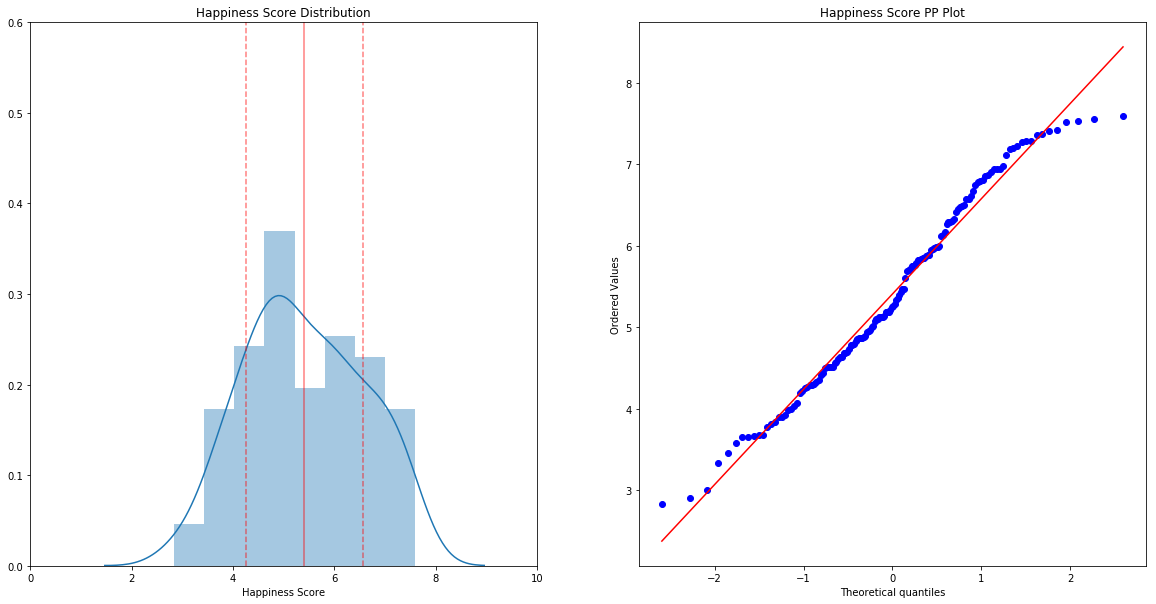

In [58]:
# Plot distribution of happiness scores on distplot and use PP plot to compare to normal distribution
figure = plt.figure(figsize=(20,10))

plt.subplot(121)
sns.distplot(data['Happiness Score'])
plt.axvline(np.mean(data['Happiness Score']),color='red',alpha=0.5)
plt.axvline((np.mean(data['Happiness Score']) + np.std(data['Happiness Score'])),color='red',linestyle='--',alpha=0.5)
plt.axvline((np.mean(data['Happiness Score']) - np.std(data['Happiness Score'])),color='red',linestyle='--',alpha=0.5)
plt.title("Happiness Score Distribution")
plt.xlim(0,10)
plt.ylim(0,0.6)

plt.subplot(122)
scipy.stats.probplot(x=data['Happiness Score'],fit=True,plot=plt)
plt.title("Happiness Score PP Plot")


Text(0.5, 1.0, 'Economic Freedom PP Plot')

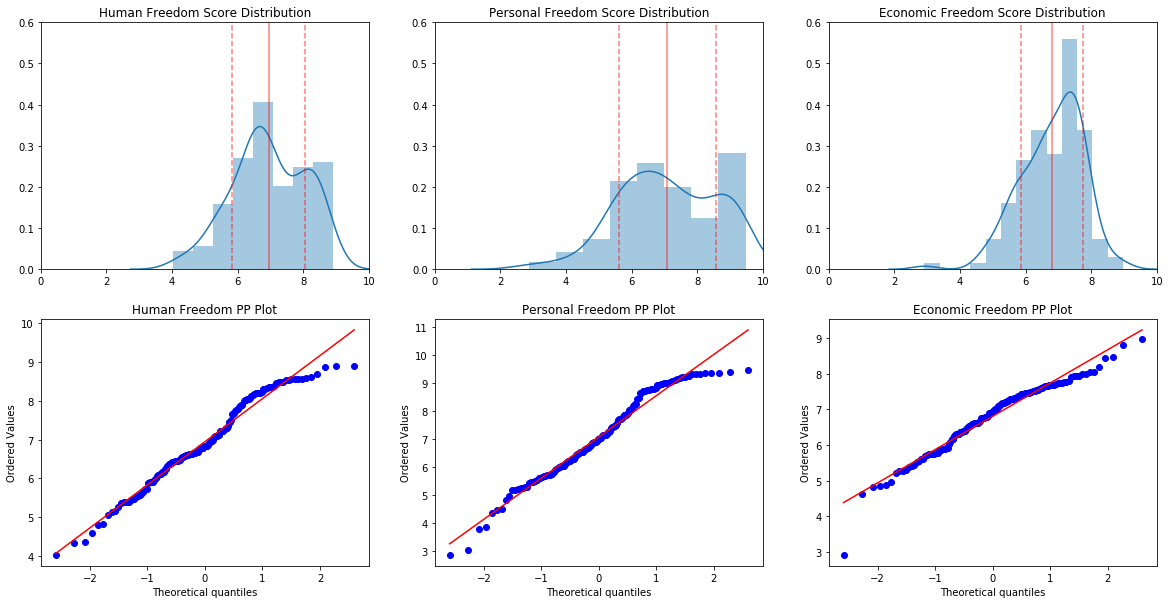

In [59]:
figure = plt.figure(figsize=(20,10))

plt.subplot(231)
sns.distplot(data['HUMAN FREEDOM (Score)'])
plt.axvline((np.mean(data['HUMAN FREEDOM (Score)']) + np.std(data['HUMAN FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline((np.mean(data['HUMAN FREEDOM (Score)']) - np.std(data['HUMAN FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline(np.mean(data['HUMAN FREEDOM (Score)']),color='red',alpha=0.5)
plt.title("Human Freedom Score Distribution")
plt.xlabel('')
plt.xlim(0,10)
plt.ylim(0,0.6)

plt.subplot(232)
sns.distplot(data['PERSONAL FREEDOM (Score)'])
plt.axvline((np.mean(data['PERSONAL FREEDOM (Score)']) + np.std(data['PERSONAL FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline((np.mean(data['PERSONAL FREEDOM (Score)']) - np.std(data['PERSONAL FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline(np.mean(data['PERSONAL FREEDOM (Score)']),color='red',alpha=0.5)
plt.title("Personal Freedom Score Distribution")
plt.xlabel('')
plt.xlim(0,10)
plt.ylim(0,0.6)

plt.subplot(233)
sns.distplot(data['ECONOMIC FREEDOM (Score)'])
plt.axvline((np.mean(data['ECONOMIC FREEDOM (Score)']) + np.std(data['ECONOMIC FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline((np.mean(data['ECONOMIC FREEDOM (Score)']) - np.std(data['ECONOMIC FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline(np.mean(data['ECONOMIC FREEDOM (Score)']),color='red',alpha=0.5)
plt.title("Economic Freedom Score Distribution")
plt.xlabel('')
plt.xlim(0,10)
plt.ylim(0,0.6)


plt.subplot(234)
scipy.stats.probplot(x=data['HUMAN FREEDOM (Score)'],fit=True,plot=plt)
plt.title("Human Freedom PP Plot")

plt.subplot(235)
scipy.stats.probplot(x=data['PERSONAL FREEDOM (Score)'],fit=True,plot=plt)
plt.title("Personal Freedom PP Plot")

plt.subplot(236)
scipy.stats.probplot(x=data['ECONOMIC FREEDOM (Score)'],fit=True,plot=plt)
plt.title("Economic Freedom PP Plot")
         

Based on the results above, all of the four datasets seem to be distributed fairly normally.  However, while the mean of the happiness scores falls almost right on 5, the other 3 variables corresponding to each of the final freedom scores calculated seem to all be somewhat right skewed.

# WHAT DOES RIGHT SKEWED DATA INDICATE FOR STUDY?

Next, I used the code below to write a simple function to determine the top ten most happy countries in the world based on these happiness scores, and compare the countries falling in this list with the top ten countries in term of economic, personal, and human freedom scores to see if there is any overlap

In [60]:
# Write function to get list of top ten countries for column selected
def top_ten(column):
    data = df.sort_values(by=column,ascending=False)
    return list(data['Country'].head(n=10))

# Determine top ten countries based on happiness scores
most_happy = top_ten('Happiness Score')

# Write function to return entries also contained in top ten most happy countries
def get_duplicates(freedom_type):
    return [word for word in freedom_type if word in most_happy]

In [61]:
print("The countries with the top 10 highest happiness scores are.....")
print(most_happy)

The countries with the top 10 highest happiness scores are.....
['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia']


In [62]:
personal = top_ten("PERSONAL FREEDOM (Score)")
print("Of these the {} below are contained in the top ten countries in terms of personal freedom scores".format(len(get_duplicates(personal))))
print(get_duplicates(personal))

Of these the 8 below are contained in the top ten countries in terms of personal freedom scores
['Norway', 'Finland', 'Netherlands', 'Denmark', 'Switzerland', 'Sweden', 'New Zealand', 'Australia']


In [63]:
economic = top_ten("ECONOMIC FREEDOM (Score)")
print("Of these the {} below are contained in the top ten countries in terms of personal freedom scores".format(len(get_duplicates(economic))))
print(get_duplicates(economic))

Of these the 3 below are contained in the top ten countries in terms of personal freedom scores
['New Zealand', 'Switzerland', 'Australia']


In [64]:
human = top_ten("HUMAN FREEDOM (Score)")
print("Of these the {} below are contained in the top ten countries in terms of human freedom scores".format(len(get_duplicates(human))))
print(get_duplicates(human))

Of these the 7 below are contained in the top ten countries in terms of human freedom scores
['Switzerland', 'New Zealand', 'Australia', 'Finland', 'Norway', 'Denmark', 'Netherlands']


Based on the data above, there is some overlap between the most happy countries and the countries with the most freedom, with New Zealand and Switzerland being contained somewhere in the top ten for all categories considered.   Furthermore,  based on overlap between the personal and human freedom scores, it can be assumed that the model used in calculating freedom scores most likely weighted personal freedom more heavily than economic freedom (since a combination of the 2 was used to calculate the human freedom scores).  To investigate this further I used the code below to explore some of the correlations within the joined data.

In [65]:
# Collect columns of interest 
data = df[['Happiness Score','HUMAN FREEDOM (Score)','PERSONAL FREEDOM (Score)','ECONOMIC FREEDOM (Score)']]

In [66]:
# Display correlation matrix of data

# USE COVARIANCE BC DATA ALREADY STANDARDIZED?
data.cov()

,Happiness Score,HUMAN FREEDOM (Score),PERSONAL FREEDOM (Score),ECONOMIC FREEDOM (Score)
Happiness Score,1.358098,0.751803,0.966060,0.537432
HUMAN FREEDOM (Score),0.751803,1.230978,1.558553,0.903206
PERSONAL FREEDOM (Score),0.966060,1.558553,2.201158,0.915928
ECONOMIC FREEDOM (Score),0.537432,0.903206,0.915928,0.890160


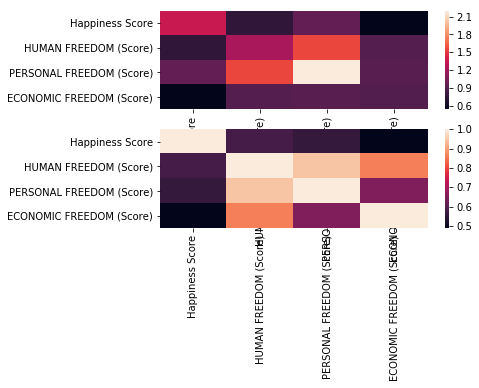

In [67]:
# Plot heatmap using correlation matrix or covariance matrix
plt.subplot(211)
sns.heatmap(data.cov())
plt.subplot(212)
sns.heatmap(data.corr())

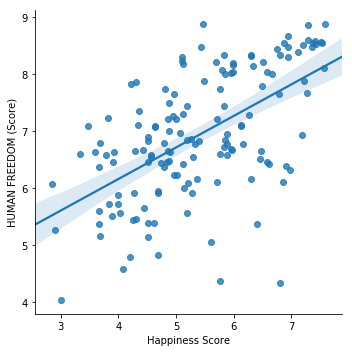

In [68]:
# Display trend lines for each type of freedom and happiness scores for each country
sns.lmplot(x='Happiness Score',
          y='HUMAN FREEDOM (Score)',
          data=data)

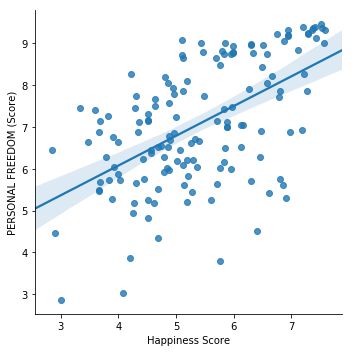

In [69]:
sns.lmplot(x='Happiness Score',
          y='PERSONAL FREEDOM (Score)',
          data=data)

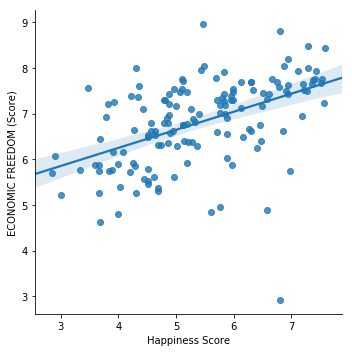

In [70]:
sns.lmplot(x='Happiness Score',
          y='ECONOMIC FREEDOM (Score)',
          data=data)

Based on the data above, the happiness scores show the highest correlation with the human freedom scores, and a slightly lesser correlation with the economic freedom scores as mentioned above.  Furthermore, while there is some trend between the happiness scores and the various freedom scores the trend is much less defined than I would have anticipated.  That is why for this study, the full range of variables in ~100 different categories (shown below) used to calculate the personal and ecomonic freedom scores will be included.   Next, the happiness scores will be joined with the full human freedom index and the many categories included will be compressed into other smaller subcategories using a principal component analysis in a way simmilar to what was done in the original study.  However, for this study, the strength with which each of these subcategories are correlated with the happiness scores can also be investigated.  If the trends seen are strong enough this study hopes to then be able to use this information to help guide people in which of these factors contribute most to human happiness on a global scale.

In [71]:
# Read in the human freedom index and print columns to show all factors that determined the personal, economic, and human freedom scores for each country.
hfi = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\Capstone_2\cato_2017_index.csv')
hfi_cols = list(hfi.columns)
print(hfi_cols)

['ISO_Code', 'Countries', 'Procedural Justice', 'Civil Justice', 'Criminal Justice', 'Rule of Law', 'Homicide', 'Disappearances', 'Violent Conflicts', 'Organised Conflicts', 'Terrorism Fatalities', 'Terrorism Injuries', 'Disapperances  Conflicts and Terrorism', 'Female Genital Mutilation', 'Missing Women', 'Inheritance Rights: Widows', 'Inheritance Rights: Daughters', 'Inheritance Rights', 'Womens Security & Safety', 'Security & Safety', 'Domestic Movement', 'Foreign Movement', 'Womens Movement', 'Movement', 'Establishing and Operating Religious Organizations', 'Harassment and Physical Hostilities', 'Legal and Regulatory Restrictions', 'Religion', 'Association', 'Assembly', 'Political Parties', 'Professional Organizations', 'Educational Sporting and Cultural Organizations', 'Establishing and Operating Organizations', 'Association Assembly & Civil Society', 'Press Killed', 'Press Jailed', 'Laws and Regulations that Influence Media Content', 'Political Pressures and Controls on Media Con

# Initial Thoughts About Data
    Based on the data above there is most likely some trend between the freedom scores and the happiness scores.  The full study proposed hopes to look further into the data to determine which metrics used in calculating the freedom scores are most strongly correlated with the happiness scores, in order to determine what factors most influence the happiness of people on a global scale.
    
# Hypothesis
    Based on the data seen so far, I believe that many of the metrics used in calculating personal freedom will show much stronger correlations to the happiness scores than the metrics used in calculating the economic freedom scores.
    
# Null Hypothesis
    The metrics used in calculating the personal, economic, and human freedom scores will show no significant correlations with the happiness scores.

# Methods for Study
    - PCA to compress 100 categories above down into smaller subcategories much like full study, only this time looking how each of subcategories correlate with happiness scores
     - Use multivariate regression to build idealized model based on categories dermined to approximate how happy people in a certain area will be given a list of certain factors if able to compress into small enough subset of categories
     - Add more years to study and more in depth survey questions
     
     
# Metrics for Sucess/Failure 
         --Correlation or Trend of a certain level? WHAT TO USE FOR STUDY/ SOMETHING TO BASE ON?
         --LOOK INTO SUCESS/FAILURE METRICS FOR INITIAL STUDY
         --Ability to create model that can predict whether happiness score will be >5 or <5
         --Ability to at the very least identify a small subset (~10 or less) of the original metrics that correlate very strongly with the happiness scores

# WORKS CITED
[1] - Citation for World Happiness Data

[2] - Citation for Human Freedom Index (2017) 
